In [8]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rashedsyed0123","key":"5af97f9a85561ad7688e0b94c3acbfef"}'}

In [9]:
!mkdir ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle/’: File exists


In [10]:
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [11]:
!kaggle competitions download -c dogs-vs-cats

 98% 799M/812M [00:09<00:00, 89.2MB/s]
100% 812M/812M [00:09<00:00, 90.7MB/s]


In [13]:
!unzip -qq dogs-vs-cats.zip

In [14]:
!unzip -qq train.zip

1. Consider the Cats & Dogs example. Start initially with a training sample of 1000, a validation sample of 500, and a test sample of 500 (like in the text). Use any technique to reduce overfitting and improve performance in developing a network that you train from scratch. What performance did you achieve?

In [ ]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_1")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2000)

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


**Importing** the numpy as np and creating the dataset with 1000 samples with vector 16.

In [ ]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


Here we are taking 32 as batch size for the data

In [ ]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


Reshaping the dataset using dataset.map

In [ ]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


In [ ]:
#Displaying the shapes of the data and labels yielded by the Dataset:

for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


**Using Keras with convolutions and Maxpooling: Creates convolutions kernel that is convolved with the layer**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
a = layers.Rescaling(1./255)(inputs)
a = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(a)
a = layers.MaxPooling2D(pool_size=2)(a)
a = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(a)
a = layers.MaxPooling2D(pool_size=2)(a)
a = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(a)
a = layers.MaxPooling2D(pool_size=2)(a)
a = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(a)
a = layers.MaxPooling2D(pool_size=2)(a)
a = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(a)
a = layers.Flatten()(a)
a = layers.Dropout(0.5)(a)
outputs = layers.Dense(1, activation="sigmoid")(a)
model = keras.Model(inputs=inputs, outputs=outputs)

**Configuring the model for training using biary crossentropy as loss function, adam optimizer and accuracy to measure the performance of the model.**

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                        

**A record of the training measurements and loss values at different epochs, along with validation metrics and loss values, is called a history attribute.**

In [ ]:
#Fitting the model using a Dataset
from keras.callbacks import ModelCheckpoint, EarlyStopping

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 15s 114ms/step - loss: 0.6953 - accuracy: 0.5065 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 2/50
63/63 [==============================] - 5s 77ms/step - loss: 0.6932 - accuracy: 0.5130 - val_loss: 0.6893 - val_accuracy: 0.5610
Epoch 3/50
63/63 [==============================] - 6s 93ms/step - loss: 0.6713 - accuracy: 0.5925 - val_loss: 0.6529 - val_accuracy: 0.6070
Epoch 4/50
63/63 [==============================] - 5s 77ms/step - loss: 0.6462 - accuracy: 0.6440 - val_loss: 0.6200 - val_accuracy: 0.6410
Epoch 5/50
63/63 [==============================] - 4s 58ms/step - loss: 0.6183 - accuracy: 0.6645 - val_loss: 0.5850 - val_accuracy: 0.7110
Epoch 6/50
63/63 [==============================] - 9s 146ms/step - loss: 0.5953 - accuracy: 0.6850 - val_loss: 0.6053 - val_accuracy: 0.6710
Epoch 7/50
63/63 [==============================] - 9s 134ms/step - loss: 0.5673 - accuracy: 0.7030 - val_loss: 0.5627 - val_accuracy: 0.7090
Epoch 8/5

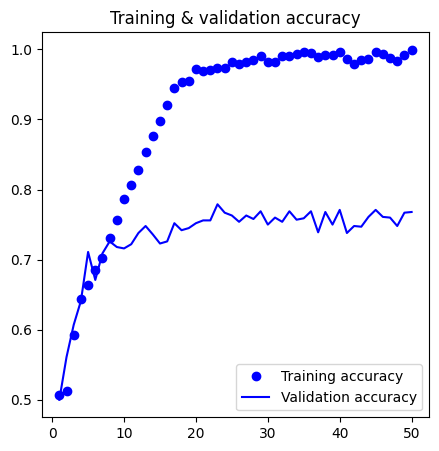

<Figure size 640x480 with 0 Axes>

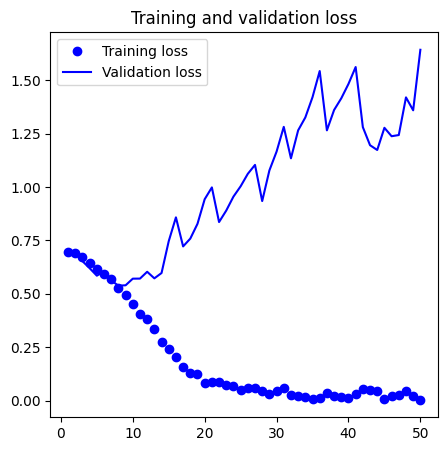

In [ ]:
#Displaying curves of loss and accuracy during training:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training & validation accuracy")
plt.legend()
plt.figure()
plt.figure(figsize=(5, 5))
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
#Evaluating the model on the test set:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 29ms/step - loss: 0.5898 - accuracy: 0.6880
Test accuracy: 0.688


**2. Increase your training sample size. You may pick any amount. Keep the validation and test samples the same as above. Optimize your network (again training from scratch). What performance did you achieve?**

In [ ]:
import os, shutil, pathlib

shutil.rmtree("./cats_vs_dogs_small_Q2", ignore_errors=True)

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_Q2")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)
#Creating training, Test and validation sets.
#Training has 1500 samples, test has 500 samples and validation has 500 samples.
make_subset("train", start_index=2000, end_index=3500)
make_subset("validation", start_index=3501, end_index=4001)
make_subset("test", start_index=4002, end_index=4502)

**Here we are using the data augmentation technique to optimize the model performance as we are dealing with large datasets (increased the train sample size to 1500)**

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

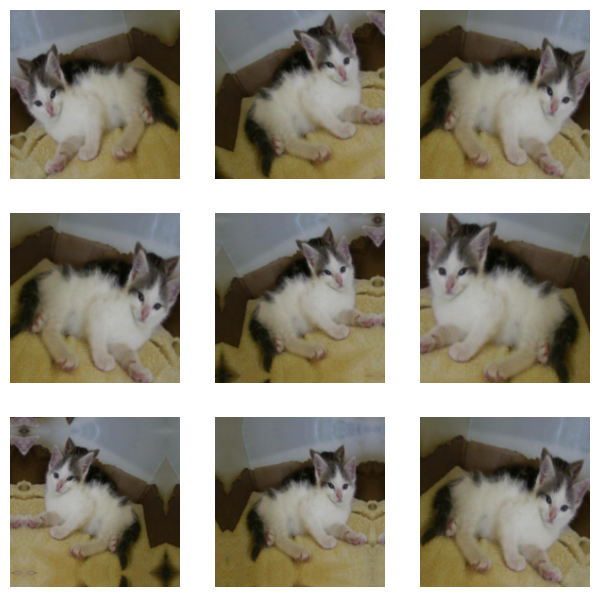

In [ ]:
#Displaying some randomly augmented training images
plt.figure(figsize=(7.5,7.5 ))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Using Data Augmentation and Dropout to optimize the model. Dropout layer only applies when training is set to True such that no values are dropped during inference**

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 6s 62ms/step - loss: 0.6952 - accuracy: 0.5005 - val_loss: 0.6942 - val_accuracy: 0.4980
Epoch 2/30
63/63 [==============================] - 4s 65ms/step - loss: 0.6933 - accuracy: 0.5115 - val_loss: 0.6921 - val_accuracy: 0.5040
Epoch 3/30
63/63 [==============================] - 8s 114ms/step - loss: 0.6852 - accuracy: 0.5480 - val_loss: 0.7256 - val_accuracy: 0.5130
Epoch 4/30
63/63 [==============================] - 4s 61ms/step - loss: 0.6773 - accuracy: 0.5835 - val_loss: 0.6854 - val_accuracy: 0.5470
Epoch 5/30
63/63 [==============================] - 4s 60ms/step - loss: 0.6577 - accuracy: 0.6230 - val_loss: 0.6296 - val_accuracy: 0.6430
Epoch 6/30
63/63 [==============================] - 6s 97ms/step - loss: 0.6345 - accuracy: 0.6490 - val_loss: 0.6311 - val_accuracy: 0.6350
Epoch 7/30
63/63 [==============================] - 7s 113ms/step - loss: 0.6209 - accuracy: 0.6620 - val_loss: 0.6294 - val_accuracy: 0.6300
Epoch 8/30


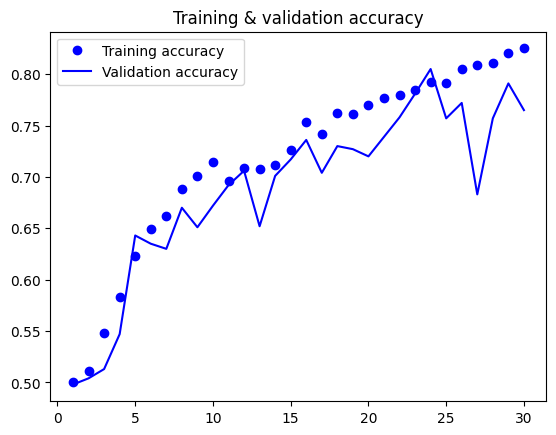

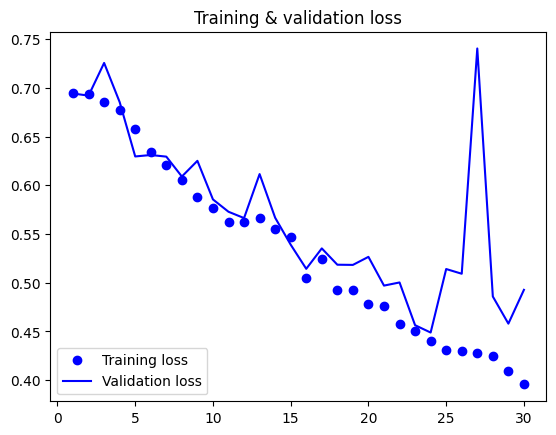

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training & validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training & validation loss")
plt.legend()
plt.show()

In [ ]:

test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 3s 53ms/step - loss: 0.4932 - accuracy: 0.7660
Test accuracy: 0.766


**3. Now change your training sample so that you achieve better performance than those from Steps 1 and 2. This sample size may be larger, or smaller than those in the previous steps. The objective is to find the ideal training sample size to get best prediction results.**

In [ ]:
original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_Q3")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)
#Creating training, Test and validation sets.
#Training has 2000 samples, test has 500 samples and validation has 500 samples.
make_subset("train", start_index=4000, end_index=6000)
make_subset("validation", start_index=6001, end_index=6501)
make_subset("test", start_index=6502, end_index=7002)

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation1.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 9s 126ms/step - loss: 0.6939 - accuracy: 0.4975 - val_loss: 0.6923 - val_accuracy: 0.5470
Epoch 2/30
63/63 [==============================] - 4s 61ms/step - loss: 0.6929 - accuracy: 0.5180 - val_loss: 0.6917 - val_accuracy: 0.5640
Epoch 3/30
63/63 [==============================] - 4s 60ms/step - loss: 0.6936 - accuracy: 0.5240 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/30
63/63 [==============================] - 7s 103ms/step - loss: 0.6940 - accuracy: 0.5050 - val_loss: 0.7073 - val_accuracy: 0.5000
Epoch 5/30
63/63 [==============================] - 4s 59ms/step - loss: 0.6940 - accuracy: 0.5125 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 6/30
63/63 [==============================] - 4s 61ms/step - loss: 0.6947 - accuracy: 0.5020 - val_loss: 0.6913 - val_accuracy: 0.5000
Epoch 7/30
63/63 [==============================] - 6s 97ms/step - loss: 0.6908 - accuracy: 0.5005 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 8/30


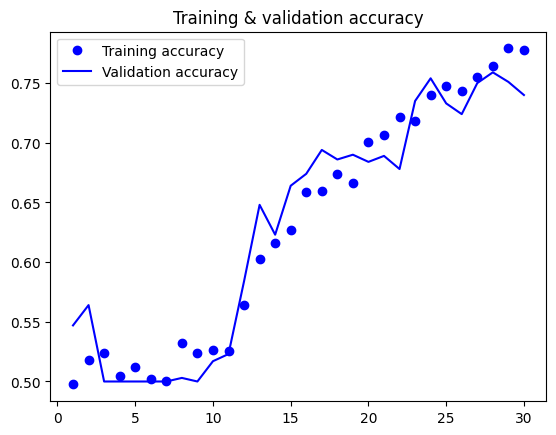

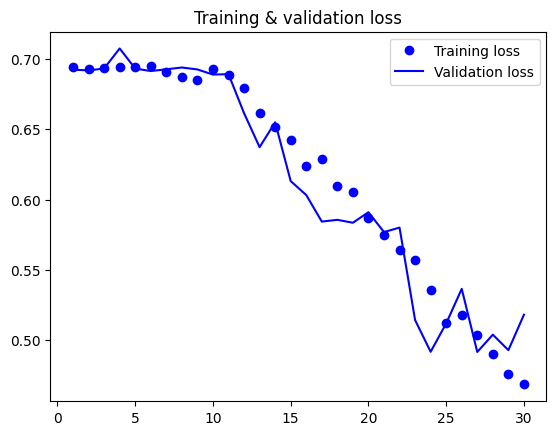

In [ ]:

import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training & validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training & validation loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation1.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 28ms/step - loss: 0.5280 - accuracy: 0.7240
Test accuracy: 0.724


**4. Repeat Steps 1-3, but now using a pretrained network. The sample sizes you use in Steps 2 and 3 for the pretrained network may be the same or different from those using the network where you trained from scratch. Again, use any and all optimization techniques to get best performance.**

In [ ]:
convolution_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [ ]:
convolution_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [ ]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = convolution_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 [==============================] - 0s 19ms/step


In [ ]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=30,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 3s 16ms/step - loss: 26.6312 - accuracy: 0.9235 - val_loss: 5.3264 - val_accuracy: 0.9570
Epoch 2/30
63/63 [==============================] - 1s 8ms/step - loss: 3.8206 - accuracy: 0.9750 - val_loss: 7.7048 - val_accuracy: 0.9560
Epoch 3/30
63/63 [==============================] - 1s 8ms/step - loss: 1.6747 - accuracy: 0.9880 - val_loss: 5.3382 - val_accuracy: 0.9690
Epoch 4/30
63/63 [==============================] - 1s 8ms/step - loss: 1.6427 - accuracy: 0.9875 - val_loss: 9.6725 - val_accuracy: 0.9570
Epoch 5/30
63/63 [==============================] - 1s 8ms/step - loss: 1.9340 - accuracy: 0.9875 - val_loss: 6.1781 - val_accuracy: 0.9720
Epoch 6/30
63/63 [==============================] - 1s 10ms/step - loss: 0.8276 - accuracy: 0.9935 - val_loss: 5.0837 - val_accuracy: 0.9730
Epoch 7/30
63/63 [==============================] - 0s 8ms/step - loss: 0.2229 - accuracy: 0.9970 - val_loss: 5.2201 - val_accuracy: 0.9780
Epoch 8/30
63/63 

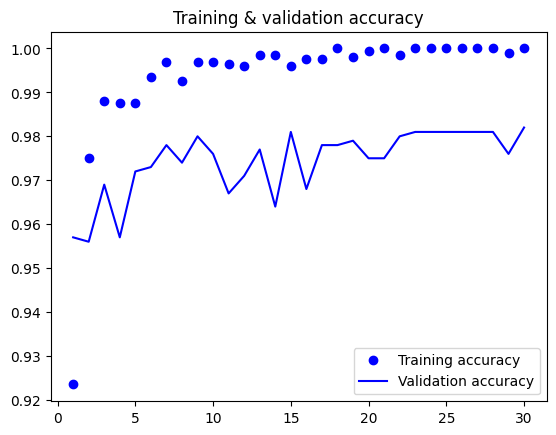

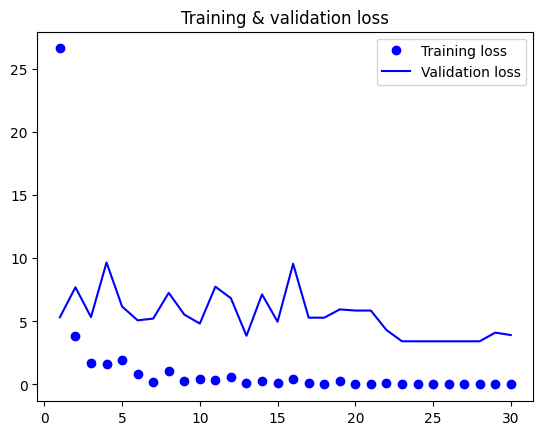

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training & validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training & validation loss")
plt.legend()
plt.show()

In [ ]:
convolution_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
convolution_base.trainable = False

In [ ]:
convolution_base.trainable = True
print("The number of trainable weights required to use the convolution base before it freezes is as follows:", len(convolution_base.trainable_weights))

The number of trainable weights required to use the convolution base before it freezes is as follows: 26


In [ ]:
convolution_base.trainable = False
print("After the convolution base is frozen, this is the total quantity of trainable weights:", len(convolution_base.trainable_weights))

After the convolution base is frozen, this is the total quantity of trainable weights: 0


In [ ]:
augmentation2 = keras.Sequential(
[
layers.RandomFlip("horizontal"),
layers.RandomRotation(0.1),
layers.RandomZoom(0.2),
]
)
input22 = keras.Input(shape=(180, 180, 3))
x1 = augmentation2(input22)
x1 =keras.layers.Lambda(
lambda x: keras.applications.vgg16.preprocess_input(x))(x1)
x1 = convolution_base(x1)
x1 = layers.Flatten()(x1)
x1 = layers.Dense(256)(x1)
x1 = layers.Dropout(0.5)(x1)
outputs = layers.Dense(1, activation="sigmoid")(x1)
model = keras.Model(input22, outputs)
model.compile(loss="binary_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 13s 178ms/step - loss: 17.1642 - accuracy: 0.9025 - val_loss: 4.5570 - val_accuracy: 0.9670
Epoch 2/30
63/63 [==============================] - 11s 170ms/step - loss: 8.7520 - accuracy: 0.9415 - val_loss: 3.7390 - val_accuracy: 0.9770
Epoch 3/30
63/63 [==============================] - 12s 183ms/step - loss: 4.5716 - accuracy: 0.9610 - val_loss: 5.2142 - val_accuracy: 0.9730
Epoch 4/30
63/63 [==============================] - 11s 178ms/step - loss: 3.9306 - accuracy: 0.9675 - val_loss: 3.1962 - val_accuracy: 0.9800
Epoch 5/30
63/63 [==============================] - 10s 158ms/step - loss: 3.8533 - accuracy: 0.9615 - val_loss: 4.1467 - val_accuracy: 0.9720
Epoch 6/30
63/63 [==============================] - 11s 164ms/step - loss: 3.6121 - accuracy: 0.9635 - val_loss: 4.1713 - val_accuracy: 0.9770
Epoch 7/30
63/63 [==============================] - 12s 196ms/step - loss: 3.6957 - accuracy: 0.9720 - val_loss: 1.5393 - val_accuracy: 0.980

In [ ]:
test_model = keras.models.load_model(
 "feature_extraction_with_data_augmentation.keras",safe_mode=False)
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 4s 94ms/step - loss: 3.8124 - accuracy: 0.9770
Test accuracy: 0.977


In [ ]:
convolution_base.trainable = True
for layer in convolution_base.layers[:-4]:
    layer.trainable = False

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 15s 188ms/step - loss: 0.6578 - accuracy: 0.9875 - val_loss: 1.9618 - val_accuracy: 0.9830
Epoch 2/30
63/63 [==============================] - 13s 203ms/step - loss: 0.6485 - accuracy: 0.9885 - val_loss: 2.1191 - val_accuracy: 0.9820
Epoch 3/30
63/63 [==============================] - 13s 202ms/step - loss: 0.4178 - accuracy: 0.9910 - val_loss: 2.0231 - val_accuracy: 0.9800
Epoch 4/30
63/63 [==============================] - 11s 173ms/step - loss: 0.4071 - accuracy: 0.9910 - val_loss: 2.1409 - val_accuracy: 0.9820
Epoch 5/30
63/63 [==============================] - 11s 164ms/step - loss: 0.3546 - accuracy: 0.9910 - val_loss: 1.9781 - val_accuracy: 0.9810
Epoch 6/30
63/63 [==============================] - 12s 187ms/step - loss: 0.3251 - accuracy: 0.9905 - val_loss: 1.8415 - val_accuracy: 0.9810
Epoch 7/30
63/63 [==============================] - 12s 192ms/step - loss: 0.6097 - accuracy: 0.9850 - val_loss: 1.7007 - val_accuracy: 0.9820

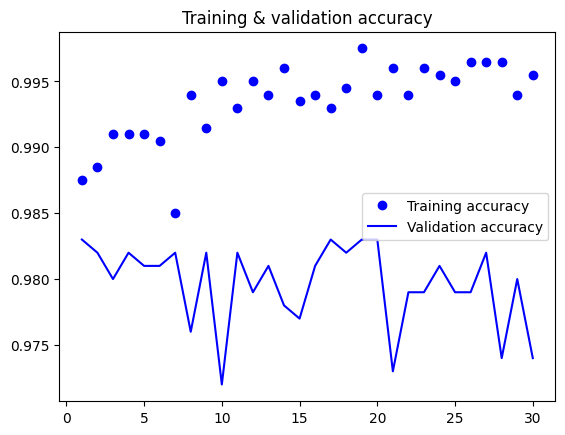

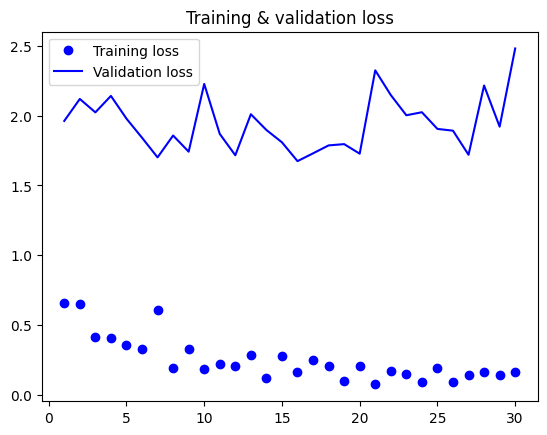

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training & validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training & validation loss")
plt.legend()
plt.show()

In [ ]:
model = keras.models.load_model("fine_tuning.keras",safe_mode=False)
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 4s 95ms/step - loss: 1.6220 - accuracy: 0.9740
Test accuracy: 0.974
